In [1]:
import cv2
import os.path
import os
import sys
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import tqdm
import re
import pickle

from keras import regularizers

from random import randint

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
from keras.models import load_model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import mtcnn
sys.path.append('..')
from utils import get_face, l2_normalizer, normalize, save_pickle, plt_show, get_encode
from PIL import Image
from mtcnn.mtcnn import MTCNN



In [2]:
mainpath = os.listdir('trainset/')
subpath = [ os.listdir('trainset/'+i) for i in mainpath ]
# total_classes = sum(subpath,[])
# total_classes[0:5]

In [3]:
encoder_model = 'Attendance_Face_Recognition/model/facenet_keras.h5'
people_dir = 'train/'
encoding_path = 'encodings/encodings.pkl'

recognition_t = 0.3
required_size = (160,160)
encoding_dict = dict()

In [4]:
new_ds = []
for i in mainpath:
    for j in os.listdir('trainset/'+i):
        p = 'trainset/'+i+"/"+j
        new_ds.append(p)

In [5]:
keyword = 'script'

In [11]:
def extract_face_as_array(impath): 
    image = Image.open(impath)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize((160,160))
    face_array = np.asarray(image)
    return face_array

In [12]:
faceCascade = cv2.CascadeClassifier("assets/haarcascade_frontalface_default.xml")
train_data = [[]]
valid_data = [[]]
emp = []
for i in new_ds:
    print('Image ',i)
    for j in os.listdir(i):
        impath = i+"/"+j;
        if(keyword in impath):
            face_arr = extract_face_as_array(impath)
            train_data.append(face_arr)
        else:
            face_arr = extract_face_as_array(impath)
            valid_data.append(face_arr)
    

Image  trainset/0014/0014_0002530
Image  trainset/0014/0014_0002623


Image  trainset/0014/0014_0002526


Image  trainset/0014/0014_0002571
Image  trainset/0014/0014_0002515


Image  trainset/0014/0014_0002540


Image  trainset/0014/0014_0002529


Image  trainset/0014/0014_0002535


Image  trainset/0014/0014_0002536


Image  trainset/0014/0014_0002614


Image  trainset/0014/0014_0002569


Image  trainset/0014/0014_0002600


Image  trainset/0014/0014_0002509


Image  trainset/0014/0014_0002570


Image  trainset/0014/0014_0002594


Image  trainset/0014/0014_0002525
Image  trainset/0014/0014_0002560


Image  trainset/0014/0014_0002510


Image  trainset/0014/0014_0002585


Image  trainset/0014/0014_0002593
Image  trainset/0005/0005_0000532


Image  trainset/0005/0005_0000451
Image  trainset/0005/0005_0000475


Image  trainset/0005/0005_0000530


Image  trainset/0005/0005_0000536


Image  trainset/0005/0005_0000452


Image  trainset/0005/0005_0000525


Image  trainset/0005/0005_0000537


Image  trainset/0005/0005_0000510


Image  trainset/0005/0005_0000439


Image  trainset/0005/0005_0000516


Image  trainset/0005/0005_0000455


Image  trainset/0005/0005_0000512


Image  trainset/0005/0005_0000464


Image  trainset/0005/0005_0000486


Image  trainset/0005/0005_0000437


Image  trainset/0005/0005_0000450


Image  trainset/0005/0005_0000497


Image  trainset/0005/0005_0000509


Image  trainset/0005/0005_0000503


Image  trainset/0005/0005_0000513


Image  trainset/0005/0005_0000449


Image  trainset/0005/0005_0000478
Image  trainset/0005/0005_0000463


Image  trainset/0005/0005_0000542


Image  trainset/0005/0005_0000487


Image  trainset/0005/0005_0000519


Image  trainset/0012/0012_0001673


Image  trainset/0012/0012_0001696


Image  trainset/0012/0012_0001691


Image  trainset/0012/0012_0001660


Image  trainset/0012/0012_0001682


Image  trainset/0012/0012_0001655


Image  trainset/0012/0012_0001700


Image  trainset/0012/0012_0001685


Image  trainset/0012/0012_0001665


Image  trainset/0012/0012_0001699


Image  trainset/0012/0012_0001680


Image  trainset/0012/0012_0001656


Image  trainset/0012/0012_0001677


Image  trainset/0012/0012_0001695


Image  trainset/0012/0012_0001688


Image  trainset/0012/0012_0001686


Image  trainset/0012/0012_0001687


Image  trainset/0006/0006_0000630
Image  trainset/0006/0006_0000610


Image  trainset/0006/0006_0000602


Image  trainset/0006/0006_0000558


Image  trainset/0006/0006_0000626
Image  trainset/0006/0006_0000603


Image  trainset/0006/0006_0000563


Image  trainset/0006/0006_0000562


Image  trainset/0006/0006_0000546
Image  trainset/0006/0006_0000566


Image  trainset/0006/0006_0000621


Image  trainset/0006/0006_0000570
Image  trainset/0006/0006_0000575


Image  trainset/0006/0006_0000592


Image  trainset/0006/0006_0000550


Image  trainset/0006/0006_0000588


Image  trainset/0006/0006_0000615


Image  trainset/0006/0006_0000637


Image  trainset/0006/0006_0000571
Image  trainset/0006/0006_0000619


Image  trainset/0006/0006_0000582


Image  trainset/0006/0006_0000584


Image  trainset/0006/0006_0000606


Image  trainset/0006/0006_0000576


Image  trainset/0006/0006_0000568
Image  trainset/0006/0006_0000565


Image  trainset/0006/0006_0000549


Image  trainset/0006/0006_0000599
Image  trainset/0006/0006_0000557


Image  trainset/0006/0006_0000613
Image  trainset/0006/0006_0000625


Image  trainset/0006/0006_0000600
Image  trainset/0006/0006_0000567


Image  trainset/0006/0006_0000601


Image  trainset/0006/0006_0000595


Image  trainset/0006/0006_0000635


Image  trainset/0006/0006_0000631


Image  trainset/0006/0006_0000564


Image  trainset/0006/0006_0000620


Image  trainset/0006/0006_0000636


Image  trainset/0006/0006_0000580
Image  trainset/0006/0006_0000577


Image  trainset/0008/0008_0001524
Image  trainset/0008/0008_0001503


Image  trainset/0008/0008_0001502


Image  trainset/0008/0008_0001469
Image  trainset/0008/0008_0001463


Image  trainset/0008/0008_0001449


Image  trainset/0008/0008_0001461


Image  trainset/0010/0010_0001632


Image  trainset/0010/0010_0001619


Image  trainset/0010/0010_0001593


Image  trainset/0010/0010_0001643


Image  trainset/0010/0010_0001633


Image  trainset/0010/0010_0001595


Image  trainset/0010/0010_0001601
Image  trainset/0010/0010_0001636


Image  trainset/0010/0010_0001614


Image  trainset/0010/0010_0001608


Image  trainset/0010/0010_0001605
Image  trainset/0010/0010_0001638


Image  trainset/0010/0010_0001613


Image  trainset/0007/0007_0001397


Image  trainset/0007/0007_0000781


Image  trainset/0007/0007_0001262


Image  trainset/0007/0007_0000977


Image  trainset/0007/0007_0000688


Image  trainset/0007/0007_0001189


Image  trainset/0007/0007_0001145


Image  trainset/0007/0007_0001185


Image  trainset/0007/0007_0001422


Image  trainset/0007/0007_0001315


Image  trainset/0007/0007_0001418


Image  trainset/0007/0007_0001082


Image  trainset/0007/0007_0000731


Image  trainset/0007/0007_0000694


Image  trainset/0007/0007_0001353


Image  trainset/0007/0007_0000736


Image  trainset/0007/0007_0001438


Image  trainset/0007/0007_0001001


Image  trainset/0007/0007_0001220


Image  trainset/0007/0007_0001415


Image  trainset/0007/0007_0001011


Image  trainset/0007/0007_0000819


Image  trainset/0007/0007_0001239


Image  trainset/0007/0007_0001260


Image  trainset/0007/0007_0001068


Image  trainset/0007/0007_0000764


Image  trainset/0007/0007_0001078
Image  trainset/0007/0007_0001394


Image  trainset/0007/0007_0000787


Image  trainset/0007/0007_0000960


Image  trainset/0007/0007_0001437


Image  trainset/0007/0007_0000661


Image  trainset/0007/0007_0000693


Image  trainset/0007/0007_0000999


Image  trainset/0007/0007_0001005


Image  trainset/0007/0007_0000852


Image  trainset/0007/0007_0000794


Image  trainset/0007/0007_0001320


Image  trainset/0007/0007_0000913


Image  trainset/0007/0007_0000967


Image  trainset/0007/0007_0000744


Image  trainset/0007/0007_0000808


Image  trainset/0007/0007_0000946


Image  trainset/0007/0007_0001195


Image  trainset/0007/0007_0000827


Image  trainset/0007/0007_0001305


Image  trainset/0007/0007_0001246


Image  trainset/0007/0007_0001420


Image  trainset/0007/0007_0000972


Image  trainset/0007/0007_0000876


Image  trainset/0007/0007_0000746


Image  trainset/0007/0007_0000974


Image  trainset/0007/0007_0001363


Image  trainset/0007/0007_0000951


Image  trainset/0007/0007_0001046
Image  trainset/0007/0007_0000685


Image  trainset/0007/0007_0000783


Image  trainset/0007/0007_0000644


Image  trainset/0007/0007_0001293


Image  trainset/0007/0007_0000774


Image  trainset/0007/0007_0000855


Image  trainset/0007/0007_0000646


Image  trainset/0007/0007_0000901


Image  trainset/0007/0007_0000893


Image  trainset/0007/0007_0001357


Image  trainset/0007/0007_0000799


Image  trainset/0007/0007_0000803


Image  trainset/0007/0007_0001218


Image  trainset/0007/0007_0001168


Image  trainset/0007/0007_0001043


Image  trainset/0007/0007_0000964


Image  trainset/0007/0007_0001086


Image  trainset/0007/0007_0000677


Image  trainset/0007/0007_0000925


Image  trainset/0007/0007_0001104


Image  trainset/0007/0007_0000907


Image  trainset/0007/0007_0000679


Image  trainset/0007/0007_0000817


Image  trainset/0007/0007_0001216


Image  trainset/0007/0007_0001171


Image  trainset/0007/0007_0001298


Image  trainset/0007/0007_0000965


Image  trainset/0007/0007_0001395


Image  trainset/0007/0007_0000833


Image  trainset/0007/0007_0001376


Image  trainset/0007/0007_0001392


Image  trainset/0007/0007_0000650


Image  trainset/0007/0007_0001297


Image  trainset/0007/0007_0001248


Image  trainset/0007/0007_0001028


Image  trainset/0007/0007_0001119
Image  trainset/0007/0007_0001322


Image  trainset/0007/0007_0001423


Image  trainset/0007/0007_0001052


Image  trainset/0007/0007_0001281


Image  trainset/0007/0007_0001215


Image  trainset/0007/0007_0001367
Image  trainset/0007/0007_0001197


Image  trainset/0007/0007_0000949


Image  trainset/0007/0007_0001318


Image  trainset/0007/0007_0001329


Image  trainset/0007/0007_0001410


Image  trainset/0007/0007_0000725


Image  trainset/0007/0007_0001333


Image  trainset/0007/0007_0001076


Image  trainset/0007/0007_0000908


Image  trainset/0007/0007_0001288


Image  trainset/0007/0007_0001050


Image  trainset/0007/0007_0000759


Image  trainset/0007/0007_0000649


Image  trainset/0007/0007_0001131


Image  trainset/0007/0007_0001159


Image  trainset/0007/0007_0000922


Image  trainset/0007/0007_0000662


Image  trainset/0007/0007_0001079


Image  trainset/0007/0007_0001407


Image  trainset/0007/0007_0000868


Image  trainset/0007/0007_0001188


Image  trainset/0007/0007_0001238


Image  trainset/0007/0007_0001280
Image  trainset/0007/0007_0001070


Image  trainset/0007/0007_0001229
Image  trainset/0007/0007_0001170


Image  trainset/0007/0007_0000985


Image  trainset/0007/0007_0000865


Image  trainset/0007/0007_0000849


Image  trainset/0007/0007_0000979


Image  trainset/0007/0007_0000717


Image  trainset/0007/0007_0001108


Image  trainset/0007/0007_0001253


Image  trainset/0007/0007_0000806
Image  trainset/0007/0007_0001111


Image  trainset/0007/0007_0000726


Image  trainset/0007/0007_0001350


Image  trainset/0007/0007_0000672


Image  trainset/0007/0007_0000703


Image  trainset/0007/0007_0000723


Image  trainset/0007/0007_0000791


Image  trainset/0007/0007_0000838


Image  trainset/0007/0007_0001289


Image  trainset/0007/0007_0000896


Image  trainset/0007/0007_0001115


Image  trainset/0007/0007_0001412


Image  trainset/0007/0007_0000835


Image  trainset/0007/0007_0000932


Image  trainset/0007/0007_0001214


Image  trainset/0007/0007_0001385


Image  trainset/0007/0007_0000939


Image  trainset/0007/0007_0001302


Image  trainset/0007/0007_0000837


Image  trainset/0007/0007_0000786


Image  trainset/0007/0007_0000710


Image  trainset/0007/0007_0001048


Image  trainset/0007/0007_0001098


Image  trainset/0007/0007_0000858


Image  trainset/0007/0007_0001107
Image  trainset/0007/0007_0000658


Image  trainset/0007/0007_0001006


Image  trainset/0007/0007_0000666


Image  trainset/0007/0007_0001137


Image  trainset/0007/0007_0000691


Image  trainset/0007/0007_0000751


Image  trainset/0007/0007_0000721


Image  trainset/0007/0007_0001012


Image  trainset/0007/0007_0001222
Image  trainset/0007/0007_0000704


Image  trainset/0007/0007_0001036


Image  trainset/0007/0007_0001254


Image  trainset/0007/0007_0000796


Image  trainset/0007/0007_0001383


Image  trainset/0007/0007_0001031


Image  trainset/0007/0007_0000873


Image  trainset/0007/0007_0000879


Image  trainset/0007/0007_0000923


Image  trainset/0007/0007_0001303


Image  trainset/0007/0007_0001139


Image  trainset/0007/0007_0001152


Image  trainset/0007/0007_0001063


Image  trainset/0007/0007_0000842


Image  trainset/0007/0007_0001380


Image  trainset/0007/0007_0001174


Image  trainset/0007/0007_0001421


Image  trainset/0007/0007_0000711


Image  trainset/0007/0007_0000645


Image  trainset/0007/0007_0001158


Image  trainset/0007/0007_0001358


Image  trainset/0007/0007_0001172


Image  trainset/0007/0007_0000839


Image  trainset/0007/0007_0000788


Image  trainset/0007/0007_0000692


Image  trainset/0007/0007_0001275


Image  trainset/0007/0007_0000660


Image  trainset/0007/0007_0001182


Image  trainset/0007/0007_0001221


Image  trainset/0007/0007_0000836


KeyboardInterrupt: 

In [23]:

# path = 'mydataset'
# faceCascade = cv2.CascadeClassifier("assets/haarcascade_frontalface_default.xml")

# for i in new_ds:
#     index=1
#     x = i.split("/")
#     foldera = x[2]
#     os.chdir('train/')
#     os.mkdir(str(foldera))
#     os.chdir('../')
    
#     os.chdir('valid/')
#     os.mkdir(str(foldera))
#     os.chdir('../')
    
#     for j in os.listdir(i):
        
#         impath = i+"/"+j;
        
#         if(keyword in impath):
# #             print(impath)
#             img = cv2.imread(impath)
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             faces = faceCascade.detectMultiScale(
#             gray,
#             scaleFactor=1.3,
#             minNeighbors=3,
#             minSize=(30, 30)
#             )
# #             print("[INFO] Found {0} Faces.".format(len(faces)))
#             os.chdir('train/')
#             os.chdir(str(foldera))
#         # faces = faceCascade.detectMultiScale(img1, 1.1, 4)
            
#             for (x,y,w,h) in faces:
#                 sub_img=gray[y:y+h,x:x+w]
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",sub_img)
                
#                 rs = cv2.imread(str(foldera)+str(index)+".jpg")
#                 os.remove(str(foldera)+str(index)+".jpg")
#                 rs = cv2.resize(rs,required_size)
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",rs)
                
#             index+=1
#             os.chdir('../../')
        
#         else:
            
# #             print(impath)
#             img = cv2.imread(impath)
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             faces = faceCascade.detectMultiScale(
#             gray,
#             scaleFactor=1.3,
#             minNeighbors=3,
#             minSize=(30, 30)
#             )
# #             print("[INFO] Found {0} Faces.".format(len(faces)))
            
#             os.chdir('valid/')
#             os.chdir(str(foldera))
                
#             for (x,y,w,h) in faces:
#                 sub_img=gray[y:y+h,x:x+w]
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",sub_img)
#                 rs = cv2.imread(str(foldera)+str(index)+".jpg")
#                 os.remove(str(foldera)+str(index)+".jpg")
#                 rs = cv2.resize(rs,required_size)
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",rs)
#             index+=1
#             os.chdir('../../')

# os.chdir('../')

# #                 cv2.rectangle(img,(x-10,y-15),(x+w+10,y+h+10),(255,255,0),3)


[[],
 array([[[  1,   2,   6],
         [  1,   2,   6],
         [  1,   2,   7],
         ...,
         [  8,   9,  14],
         [ 10,  11,  15],
         [ 13,  14,  18]],
 
        [[  1,   2,   7],
         [  1,   2,   7],
         [  1,   2,   7],
         ...,
         [  7,   8,  12],
         [  8,   9,  13],
         [  8,   9,  13]],
 
        [[  1,   2,   8],
         [  1,   2,   8],
         [  1,   2,   8],
         ...,
         [  7,   8,  10],
         [  7,   8,  10],
         [  7,   8,  10]],
 
        ...,
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199],
         [ 30, 107, 199],
         [ 30, 107, 199]],
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199],
         [ 30, 107, 199],
         [ 30, 107, 199]],
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199

In [10]:
# def triplet_loss(y_true, y_pred, alpha = 0.2):
#     anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
# #    
#     # triplet formula components
#     pos_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[1])) )
#     neg_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[2])) )
#     basic_loss = pos_dist - neg_dist + alpha
    
#     loss = tf.maximum(basic_loss, 0.0)
   
#     return loss
# os.chdir('Attendance_Face_Recognition/')

In [12]:
face_encoder = load_model('model/facenet_keras.h5')

In [13]:
def get_embedding(model, face_pixels):               
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = np.expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

In [14]:
from PIL import Image
from mtcnn.mtcnn import MTCNN

def extract_face_as_array(filename): 
    # load image from file
    image = Image.open(filename)
    image = Image.fromarray(np.asarray(image))
    face_array = np.asarray(image)
    return face_array

In [26]:
og_face = extract_face_as_array('train/0001_0000262/0001_00002622.jpg')
t_face = extract_face_as_array('valid/0001_0000262/0001_00002621.jpg')
t_face2 = extract_face_as_array('valid/0001_0000278/0001_00002781.jpg')

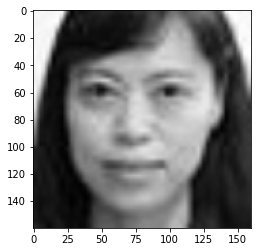

In [16]:
plt.imshow(og_face)

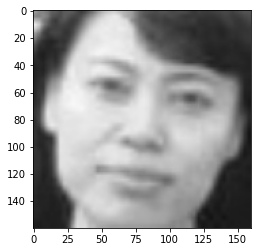

In [17]:
plt.imshow(t_face)

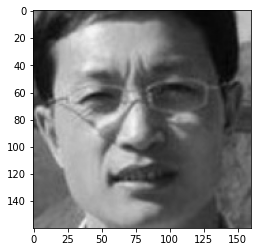

In [18]:
plt.imshow(t_face2)

In [19]:
og_face = extract_face_as_array('train/0001_0000298/0001_000029816.jpg')
t_face = extract_face_as_array('valid/0001_0000298/0001_000029811.jpg')
t_face2 = extract_face_as_array('valid/0001_0000278/0001_00002781.jpg')

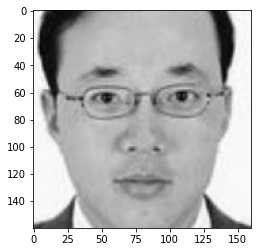

In [20]:
plt.imshow(og_face)

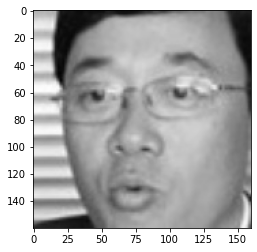

In [21]:
plt.imshow(t_face)

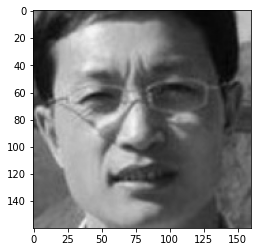

In [22]:
plt.imshow(t_face2)

In [27]:
og_embedding = get_embedding(face_encoder,og_face)    
t_embedding = get_embedding(face_encoder,t_face)
t_embedding2 = get_embedding(face_encoder,t_face2)

In [28]:
dist = np.linalg.norm(t_embedding-og_embedding)    
dist

6.3197947

In [29]:
dist2 = np.linalg.norm(t_embedding2-og_embedding)
dist2

14.448308

In [68]:
s_score = []
idofimg = []
index = 0
o_face = extract_face_as_array('valid/0005_0000463/0005_00004631.jpg')
print('train/'+i+'/'+imgp1[0])
og_embedding = get_embedding(face_encoder,o_face)    
for j in os.listdir('train/'):
        imgp2 = os.listdir('train/'+j)
        
        if(imgp2):
            t_face =  extract_face_as_array('train/'+j+"/"+imgp2[0])
            t_embedding = get_embedding(face_encoder,t_face)
            idofimg.append(imgp2[0])
            s_score.append(np.linalg.norm(t_embedding-og_embedding))  
            print(np.linalg.norm(t_embedding-og_embedding))
        else:
            s_score.append(10)
        
            
        
    

train/0002_0000308/0002_000030813.jpg
11.644411
13.841456
14.645567
10.4389715
10.244183
9.198805
9.4968605
13.300932
8.645188
12.096696
12.046284
13.670815
10.669802
11.386604
10.56879
13.1746025
11.260445
12.731345
12.428098
16.102665
10.025982
11.769818
11.393386
13.025853
11.772235
12.290767
13.469291
12.430868
12.491624
12.01379
11.778442
12.812783
12.258772
10.242582
10.450836
12.942851
8.93015
10.558623
11.791614
10.528121
9.446782
12.34214
11.890095
12.212248
12.907233
15.391186
11.328909
10.039433
10.1801405
11.346923
13.357105
6.57262
14.30254
9.7783785
12.706529
9.322789
10.295729
9.5039015
13.904518
11.96498
8.221434
10.924234
10.710092
11.670317
12.422096
12.233016
8.865327
11.522261
12.543877
11.933707
10.552351
11.945016
13.29199
10.395931
12.570996
11.088081
13.3720045
12.066859
11.341781
12.899125
14.396426
11.450278
12.07571
13.712007
11.899718
14.055231
11.656397
15.606872
13.323719
13.866481
9.830342
11.205724
12.223423
12.233726
10.291543
14.256724
10.860206
10.363

14.8910885
12.180296
11.134704
11.826583
15.043238
13.379674
12.658241
12.352516
12.562968
13.434916
12.854297
9.508622
12.645783
12.936316
10.454242
11.182417
13.087958
10.199581
13.115679
14.188499
14.278396
12.618148
12.665635
12.363488
13.071299
9.850829
12.700113
12.055706
11.933131
12.253057
13.478718
13.827576
11.926199
9.509635
10.848399
14.3548155
11.491713
13.171887
13.830112
11.501749
13.016787
12.723375
9.242075
10.341391
10.361898
10.164496
13.595242
13.085381
14.227705
12.520822
13.407867
12.0805
12.806793
12.619589
11.2199135
9.98224
11.917504
13.675443
13.67199
11.4728565
10.285365
12.529274
10.6488085
13.387714
14.485304
11.010001
9.767572
10.502867
11.243225
13.082642
10.992059
11.953585
13.805579
13.606304
13.490963
12.897037
12.958624
13.219458
11.142237
14.451334
12.356834
12.159444
15.764486
12.370536
10.790132
10.164626
8.09977
13.332439
13.884529
11.919145
10.117791
12.798594
13.381596
13.434799
15.277174
12.707909
11.9604025
12.168985
12.444699
11.610019
10.414

In [69]:
s_score.index(min(s_score))

51

In [73]:
idofimg[51]

'0005_00004632.jpg'

In [71]:
df = pd.DataFrame(s_score)

In [72]:
df.describe()

,0
count,1012.000000
mean,12.215450
std,1.381125
min,6.572620
25%,11.303306
50%,12.230958
75%,13.159082
max,16.310265
